# **Radiation**

Authors: GEOframe group.

This work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
____

### *What about Radiation*
G. Formetta, R. Rigon, J. L. Chávez, and O. David. Modeling shortwave solar radiation using the JGrass-NewAge system.
Geoscientific Model Development, 6(4):915–928, jul 2013b. ISSN 1991959X.
doi: 10.5194/gmd-6-915-2013.URL https://www.geosci-model-dev.net/6/915/2013/.

G. Formetta, M. Bancheri, O. David, and R. Rigon. Performance of site-specific parameterizations of longwave radiation.
Hydrology and Earth System Sciences, 20(11):4641–4654, nov 2016. ISSN 16077938.
doi: 10.5194/hess-20-4641-2016.URL https://www.hydrol-earth-syst-sci.net/20/4641/2016/.

In [1]:
import os
import warnings
import datetime
import warnings
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import rc
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates
from IPython.display import Image
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
oms_project_path = os.path.dirname(os.getcwd())

## **Longwave Radiation**
https://github.com/GEOframeOMSProjects/OMS_Project_LWRB

**Longwave radiation** (1-100 μm) is an important component of the radiation balance on Earth which affects many phenomena such as **evapotranspiration**, snow melt, glaciers evolution , vegetation dynamics, plant respiration, and primary productivity. 
Many simplified models (SM) have been proposed in order to model $L_{\downarrow}$ and $L_{\uparrow}$ by using easily available meteorological observation such as air temperature, relative humidity, incoming solar radiation, and cloud cover. Ten SM for estimating $L_{\uparrow}$ and one for $L_{\downarrow}$ were integrated in the LWRB component.


SMs formulation for $L_{\uparrow}$ $[Wm^{−2}]$ and $L_{\downarrow}$ $[Wm^{−2}]$ are based on the **Stefan-Boltzmann equation**:

**\begin{equation}
L_{\downarrow} = \epsilon_{all-sky} · \sigma · T_{a}^{4} \\
L_{\uparrow}= \epsilon_{s} · \sigma · T_{s}^{4}
\end{equation}**
where:
- $\sigma = 5.670\cdot 10^{-8}$ is the Stefan-Boltzmann constant,
- $\epsilon_{all-sky}$ [-] is the atmosphere effective emissivity,
- $\epsilon_{s}$ [-] is the soil emissivity
- $T_{a}$ [K] is the near-surface air temperature,
- $T_{s}$ is the surface soil temperature. 

In order to account for the increase of $L_{\downarrow}$ in cloud cover conditions is formulated according to equation:
**\begin{equation}
\epsilon_{all−sky} = \epsilon_{clear} \cdot (1 + a \cdot c^{b})
\end{equation}**
where:
- c [-] is the clearness index 
- a and b are two calibration coefficients. 

Ten literature formulations were implemented for the computation of $\epsilon_{clear}$. The complete list of parameterizations used is presented in table 1 where it is specified: the component number, the component name, the equation that defines it, and the reference to the paper from which it is derived. X, Y and Z are the parameters provided in literature for each model.

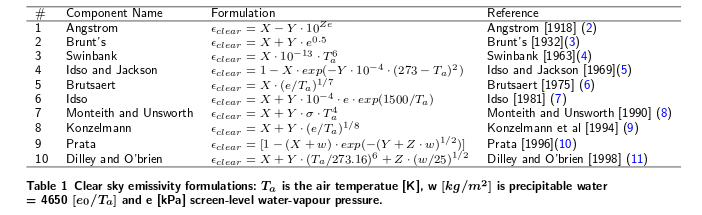

In [2]:
Image(oms_project_path+"/Images/lwrb1.png")

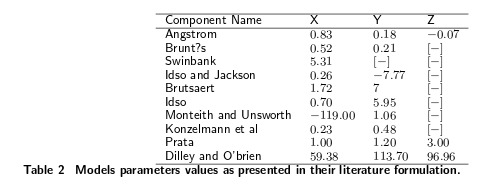

In [3]:
Image(oms_project_path+"/Images/lwrb2.png")

The formulation of the $L_{\uparrow}$ requires the *soil emissivity*, which usually is a property of the nature of surface, and the surface soil temperature. Table 3 shows the literature values of the soil emissivity for different types of surface: $\epsilon_{s}$ varies from its minimum of 0.95 for the bare soils up to its maximum of 0.99 for the fresh snow

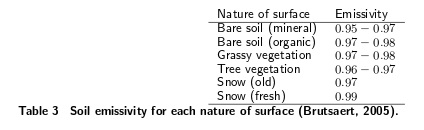

In [4]:
Image(oms_project_path+"/Images/lwrb3.png")

  ____

<bar>

### **Shortwave Radiation**
https://github.com/GEOframeOMSProjects/OMS_Project_SWRB

The incident shortwave (S) on an arbitrary sloping surface in a point under cloudless sky conditions is given by:
\begin{equation}
S_{\downarrow} = C_{1}\cdot I_{sc} \cdot E_{0} \cdot cos(\theta_{s} ) \cdot (T_{s} + \beta_{s} ) \cdot \psi 
\end{equation}
in which:
- $C_{1} = 0.9751$ is the fraction of solar radiation that is included between 0.3 and 3.0 μm wavelengths;
- $I_{sc}$ is the solar constant ∼ 1367 [$W m^{−2}$]
- $E_{0}$ [–] is a correction factor related to Earth’s orbit eccentricity computed according to Spencer (1971);
- $T_{s}$ [–] is the product of the atmospheric transmittance;
- $\beta_{s}$ [m] is a correction factor for increased transmittance with elevation z[m] defined according to Corripio (2002);
- $\theta_{s}$ [rad] is the angle between the Sun vector and the surface plane;
- $\psi$ is the shadows index that accounts for the sun or shadow of the point under analysis. 

The modeling of the diffuse component of solar radiation, $d_{\downarrow}$ , follows:
\begin{equation}
d_{\downarrow} = (d_{\downarrow r} + d_{\downarrow a} + d_{\downarrow m} ) · V_{s} ,
\end{equation}

where $d_{\downarrow r}, d_{\downarrow a}$ and $d_{\downarrow m}$ are the diffuse irradiance components after the first pass through the atmosphere due to the Rayleigh scattering, the aerosol scattering and multiple reflection,respectively.

Finally $V_{s}$ is the sky view factor, i.e., the fraction of sky visible in a point, computed using the algorithm presented in Corripio (2002).

  ____

<bar>

### **Net Radiation**
https://github.com/GEOframeOMSProjects/OMS_Project_NETRAD

Net radiation is a balance between incoming and outgoing radiation at a point on the Earth's surface; it is often divided into short wave and long wave.

$$ Rn=(1-\alpha)(Rs+d)+Rl_d-Rl_u $$

 - Rn: radiazione netta [$MJ \cdot m^{2} \cdot day^{−1}$]
 - $\alpha$: albedo
 - Rs: radiazione ad onda corta diretta [$MJ \cdot m^{2} \cdot day^{−1}$]
 - d: radiazione ad onda corta diffusa [$MJ \cdot m^{2} \cdot day^{−1}$]
 - Rl_d: radiazione ad onda lunga rilasciata dall'atmosfera [$MJ \cdot m^{2} \cdot day^{−1}$]
 - Rl_u: radiazione ad onda lunga rilascita dal suolo [$MJ \cdot m^{2} \cdot day^{−1}$]


  ____

## Input data for running the simulation

In [5]:
os.chdir(oms_project_path + '/data/Cavone/1')
#os.listdir()

### **Skyview factor**
Complete documentation: https://osf.io/krvx3/

The skyview factor is a value in the range 0 to 1.


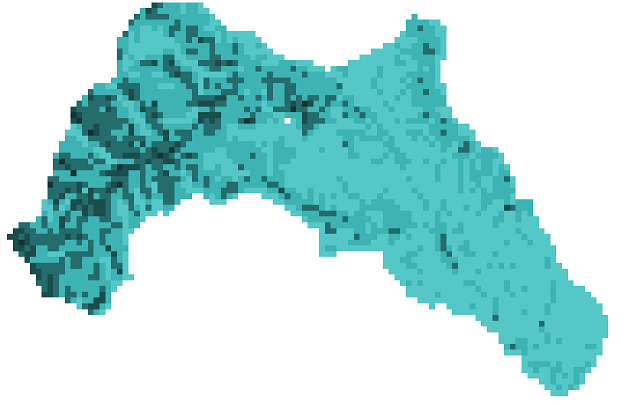

In [6]:
Image(oms_project_path+"/Images/sky.png")

### **Digital Elevation Model**

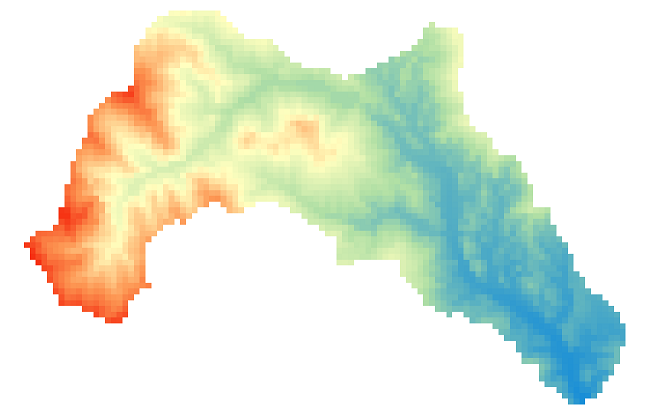

In [7]:
Image(oms_project_path+"/Images/DEM.png")

### **Air Temperature $[°C]$**

In [2]:
df2 = pd.read_csv('airT_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df2.columns = ['Datetime','Temperature']
fig = px.line(df2, x='Datetime', y='Temperature')
fig.update_traces(line_color='red')
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: 'airT_1.csv'